### Import Dependencies

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import string
import time

## Define Functions to Make and Sort Lists of Random Names of Specified Length

In [18]:
def tenthousand_names(name_length):
    random.seed(14)
    names = [''.join(random.choices(string.ascii_letters, k=name_length)) for j in range(100000)]
    if len(set(names)) < 100000:
        names = [''.join(random.choices(string.ascii_letters, k=50)) for j in range(100000)]
        tenthousand_names(100000)
    else:
        print('All set!')
    return names

def quicksort(array):
    if len(array) < 2:
        # base case, arrays with 0 or 1 element are already "sorted"
        return array
    else:
        # recursive case
        pivot = array[0]
        # sub-array of all the elements less than the pivot
        less = [i for i in array[1:] if i <= pivot]
        # sub-array of all the elements greater than the pivot
        greater = [i for i in array[1:] if i > pivot]
    return quicksort(less) + [pivot] + quicksort(greater)

## Store Strings in Temporary Array from Given Positions

In [19]:
# Generate names so that this cell works every time it is run - not dependent on other cells
names_unsorted = tenthousand_names(10)
names_set = set(tenthousand_names(10))
names_sorted = quicksort(tenthousand_names(10))

All set!
All set!
All set!


In [20]:
temp_array = []
positions = [10000, 30000, 50000, 70000, 90000, 100000]
for i in positions:
    i -= 1 #adjust for 0-based indexing
    ith_name = names_unsorted[i]
    temp_array.append(ith_name)

## Search for Each String in Temporary Array

Use linear search for the unsorted list, binary search for the sorted list, and the .remove() method for the set.

In [21]:
def linear_search(array, item):
    counter = 0
    name = ''
    while counter+1 < len(array): #while the list is not yet exhausted...
        name = array[counter] # set the name equal to the next item in the array...
        if name == item: # if the name matches the item...
            break        # ...end the loop
        else:            # if the name does NOT equal the item...
            counter += 1 # increment the counter to get to the next array item...
            pass         # ...and restart the loop

def binary_search(array, item):
  # low and high keep track of which part of the list you'll search in.
    low = 0
    high = len(array) - 1

  # While you haven't narrowed it down to one element ...
    while low <= high:
    # ... check the middle element
        mid = (low + high) // 2
        guess = array[mid]
    # Found the item.
        if guess == item:
            return mid
    # The guess was too high.
        if guess > item:
            high = mid - 1
    # The guess was too low.
        else:
            low = mid + 1

  # Item doesn't exist
    return None

In [22]:



# Initialize lists to hold execution times
linear_execution = []
binary_execution = []
set_remove_execution = []

# Linear Search for unsorted list

for i in temp_array:
    t1 = time.perf_counter()
    linear_search(names_unsorted, i)
    t2 = time.perf_counter()
    execution = t2-t1
    linear_execution.append(execution)

# Binary search for sorted list

for i in temp_array:
    t1 = time.perf_counter()
    binary_search(names_sorted, i)
    t2 = time.perf_counter()
    execution = t2-t1
    binary_execution.append(execution)

# Set.remove() for set

for i in temp_array:
    t1 = time.perf_counter()
    names_set.remove(i)
    t2 = time.perf_counter()
    execution = t2-t1
    set_remove_execution.append(execution)

print('All executions complete.')

All executions complete.


## Make Execution Times Into Table, Use Visualization to Show Algorithm Performance

Create a table and plot comparing times of linear search, binary search and set lookup for the six names using Python (matplotlib or Seaborn) or JavaScript (D3) visualization tools to illustrate algorithm performance. 

In [23]:
df = pd.DataFrame({
    'element_number' : positions
    ,'linear_search' : linear_execution
    ,'binary_search' : binary_execution
    ,'set_removal'   : set_remove_execution
})
df

,element_number,linear_search,binary_search,set_removal
0,10000,0.001852,0.000010,1.746000e-06
1,30000,0.006261,0.000007,7.670001e-07
2,50000,0.013660,0.000008,6.939999e-07
3,70000,0.013188,0.000006,7.730000e-07
4,90000,0.013883,0.000007,9.860000e-07
5,100000,0.016318,0.000007,8.939996e-07


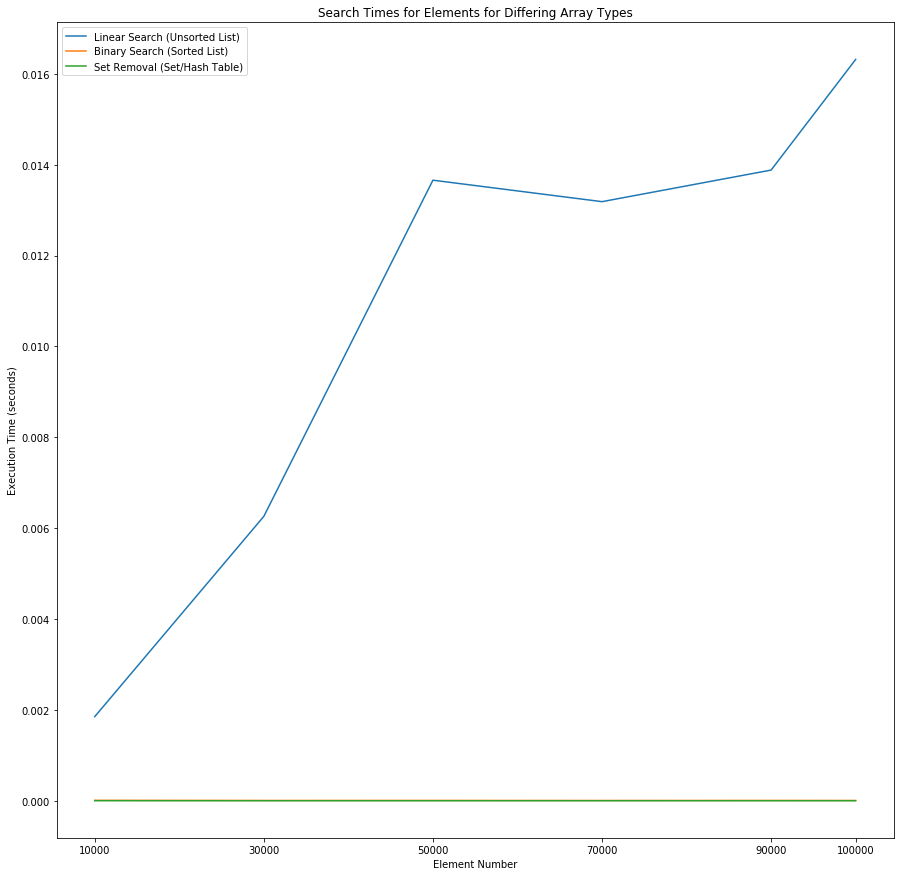

In [32]:
ax = sns.lineplot(x='element_number', y='linear_search', data=df)
ax = sns.lineplot(x='element_number', y='binary_search', data=df)
ax = sns.lineplot(x='element_number', y='set_removal', data=df)
ax.legend(['Linear Search (Unsorted List)','Binary Search (Sorted List)','Set Removal (Set/Hash Table)'])

plt.title('Search Times for Elements for Differing Array Types')
plt.xlabel('Element Number')
plt.ylabel('Execution Time (seconds)')
plt.xticks(positions)
plt.rcParams["figure.figsize"] = (15,15)
plt.show()

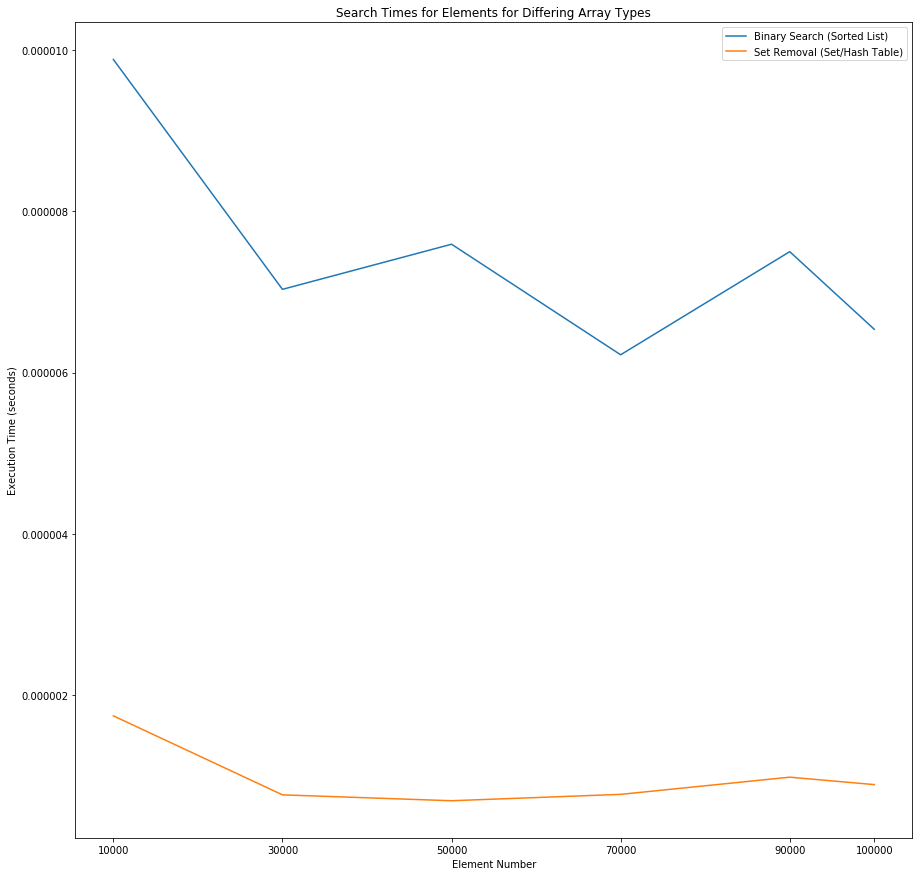

In [33]:
ax = sns.lineplot(x='element_number', y='binary_search', data=df)
ax = sns.lineplot(x='element_number', y='set_removal', data=df)
ax.legend(['Binary Search (Sorted List)','Set Removal (Set/Hash Table)'])

plt.title('Search Times for Elements for Differing Array Types')
plt.xlabel('Element Number')
plt.ylabel('Execution Time (seconds)')
plt.xticks(positions)
plt.rcParams["figure.figsize"] = (15,15)
plt.show()

## Discussion

As we might have exepected, the linear search (with $O(n)$ time complexity) took the most time of any of the three algorithms - this would have been true whether or not the list (or set) was sorted or unsorted.

Because the set is implemented in Python as a hash table, this has an $O(1)$ time complexity attached to it - it can look up the value nearly immediately with the set.remove() method. The time difference between set removal and binary search is illustrated in the second graph (with fluctuations in the set removal being largely attributable to background processes, as it is on the $1.0e^{-06}$ level of magnitude.

The purpose of the comparison between these three algorithms for finding a set value is not necessarily to compare the algorithms themselves, but to display the computational efficiency of hash tables in practice, allowing for a fast and massively scalable data storage and retrieval method.